# Task 1A

##### I imported important packages to python like pandas, numpy, seaborn and matplotlib.pyplot. I then loaded the file.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv(r'C:\Users\simen\Desktop\data.csv')
print(df)

     total_bill   tip smoker   day    time  size
0         16.99  1.01     No   Sun  Dinner     2
1         10.34  1.66     No   Sun  Dinner     3
2         21.01  3.50     No   Sun  Dinner     3
3         23.68  3.31     No   Sun  Dinner     2
4         24.59  3.61     No   Sun  Dinner     4
..          ...   ...    ...   ...     ...   ...
239       29.03  5.92     No   Sat  Dinner     3
240       27.18  2.00    Yes   Sat  Dinner     2
241       22.67  2.00    Yes   Sat  Dinner     2
242       17.82  1.75     No   Sat  Dinner     2
243       18.78  3.00     No  Thur  Dinner     2

[244 rows x 6 columns]


# Task 1B
### Exploring the data and visualizing it

##### Head() to showcase the five first rows in this dataframe. I used this to see what the dataframe looked like.

In [2]:
df.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


##### I used df.types to check the different variables for each column. It is important to know what variables we will be working with in this Dataframe

In [3]:
df.dtypes

total_bill    float64
tip           float64
smoker         object
day            object
time           object
size            int64
dtype: object

##### I Used df.info to get a summary of information about the dataframe. The information i get is dtypes for the columns, memory usage and non-null values.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   smoker      244 non-null    object 
 3   day         244 non-null    object 
 4   time        244 non-null    object 
 5   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 11.6+ KB


##### I used df.dropna to drop NA values.

In [5]:
df.dropna()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


##### I found out what was the total sum of the bill and the tip.

In [6]:
print(df['total_bill'].sum())
print(df['tip'].sum())

4827.77
731.5799999999999


### What I found out in the data exploration:
##### In the data exploration I found out information about the dataframe. The dataframe has a range index from 0 to 243 rows and has 6 columns. This dataframe contains three numeric variables and three objects. The dataframe had no null-values and has a memory of 11,6+ KB. Sum of the total bill is 4827,77 and the sum of the tip is 731,579.

## Visualisation:
#### In this visualization I used counterplots. Here we see a counterplot which shows how many smokers and non-smokers there were per day. So on sunday it was the most non-smoker, and on saturday it was the most smokers.

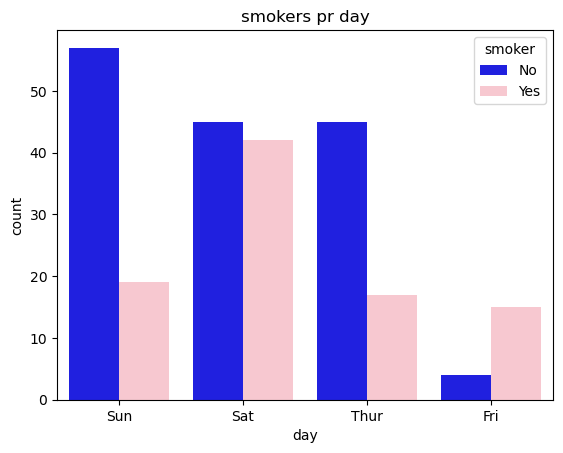

In [7]:
sns.countplot(data=df, x='day', hue='smoker', palette=['blue', 'pink'])
plt.title('smokers pr day')
plt.show()

##### I made a scatterplot to showcase the total bill for each day and what they had like dinner or lunch. I used seaborn, set x axis to days and Y-axis to total bill. I customised the color to blue and red. I customised the legend to show meal, and the title to be "total bill for dinner/lunch.

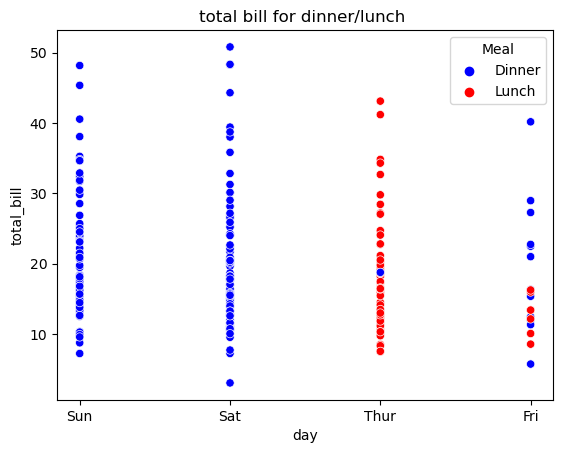

In [8]:
sns.scatterplot(x='day', y='total_bill', data=df, hue='time', palette=['blue', 'red'],legend=True)
plt.title('total bill for dinner/lunch ')
plt.legend(title='Meal', loc='upper right')
plt.show()

##### I made a barplot to show what size (X-axis) and tip(Y-axis). Here we see what party sized tipped the most from all the data. It was those who was two people.

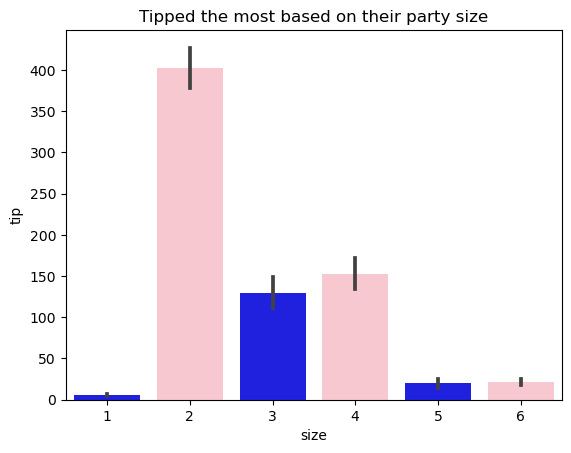

In [9]:
sns.barplot(x='size', y='tip', data=df, estimator=sum, palette=['blue', 'pink'])
plt.title('Tipped the most based on their party size')
plt.show()

# Task 1 C
#### Data cleaning and transformation.

##### I used df.isna.any() to find if there was any null values in this dataset. The purpose is that to clean up the dataframe. If it was any NA value i would have used df.fillna to fill those NA values.

In [10]:
df.isna().any()

total_bill    False
tip           False
smoker        False
day           False
time          False
size          False
dtype: bool

##### I used df.duplicated to find out if there was any duplicated values. I got boolean values for duplicate values in this dataframe. If it was any duplicated values it would have an affect on the accuracy and the efficency.

In [11]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
239    False
240    False
241    False
242    False
243    False
Length: 244, dtype: bool

##### I changed the column name from time to meal because it was more appropriate.

In [12]:
df1=df.rename(columns={'time':'meal'})

##### I made a new column named "total_bill_pp", this show what the bill was per person. I wanted this with, so I could see who paid the most or least.

In [13]:
df1['total_bill_pp']=df1['total_bill']/df1['size']

##### I found out what percentage per person total cost was. I wanted to see the percentage per person had to pay based on their party size.

In [14]:
df1['perc_bill_pp']=df1['total_bill_pp']/df1['total_bill']*100

##### I made another column called total_tip_pp. I wanted to see what each person tipped.

In [15]:
df1['total_tip_pp']=df1['tip']/df1['size']

##### I used df.head() to show the first 5 rows of the dataframe.

In [16]:
df1.head()

,total_bill,tip,smoker,day,meal,size,total_bill_pp,perc_bill_pp,total_tip_pp
0,16.99,1.01,No,Sun,Dinner,2,8.495000,50.000000,0.505000
1,10.34,1.66,No,Sun,Dinner,3,3.446667,33.333333,0.553333
2,21.01,3.50,No,Sun,Dinner,3,7.003333,33.333333,1.166667
3,23.68,3.31,No,Sun,Dinner,2,11.840000,50.000000,1.655000
4,24.59,3.61,No,Sun,Dinner,4,6.147500,25.000000,0.902500


### Data cleaning and transformation:
##### I cleaned the data by checking if there was any null values, it wasn't. After that I checked if there was any duplicated values, it was false. Then I started transforming the dataframe. The first thing I did was to change the column name 'time' to 'meal' because it was more appropriate. I made three new columns that I wanted to visualize named 'total_bill_pp', 'perc_bill_pp' and 'total_tip_pp'. I made these to see more in dept what each person paid.
##### This dataframe was pretty clean to start with. I did not drop any columns because I think the columns in this dataframe is important data to have.

### Task 1 D

##### Here we see a lineplot. This lineplot shows X the size, and Y the percentage of the bill for each person. Those who was one paid 100% for there bill, those who was two paid 50% and so on.

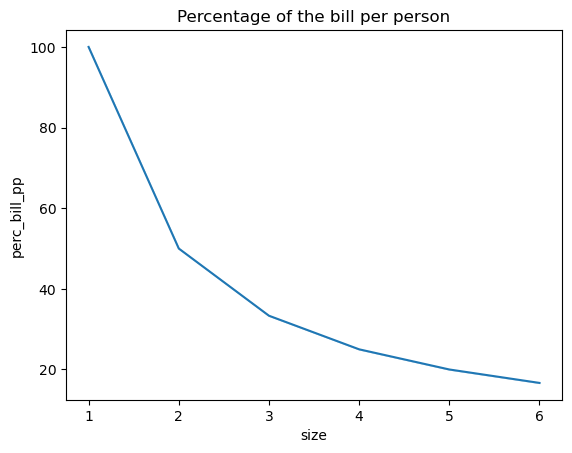

In [17]:
sns.lineplot(x='size', y='perc_bill_pp', data=df1 )
plt.title('Percentage of the bill per person')
plt.show()


##### I made a scatter subplots. On the first scatterplot named "Bill per person" Here we can see most of the data values,fall under the range 10 to 30. We can also reconfirm that the proportional relationship that we see in the dataframe under "perc_spent_pp" is True.
##### In the second subplot named "Tip per person". Here we see the total amount paid per person and what they tipped. We can also check if it was a smoker who paid the highest bill and tipped the most.
##### I made a subplot by connecting the axes to the two scatterplots.

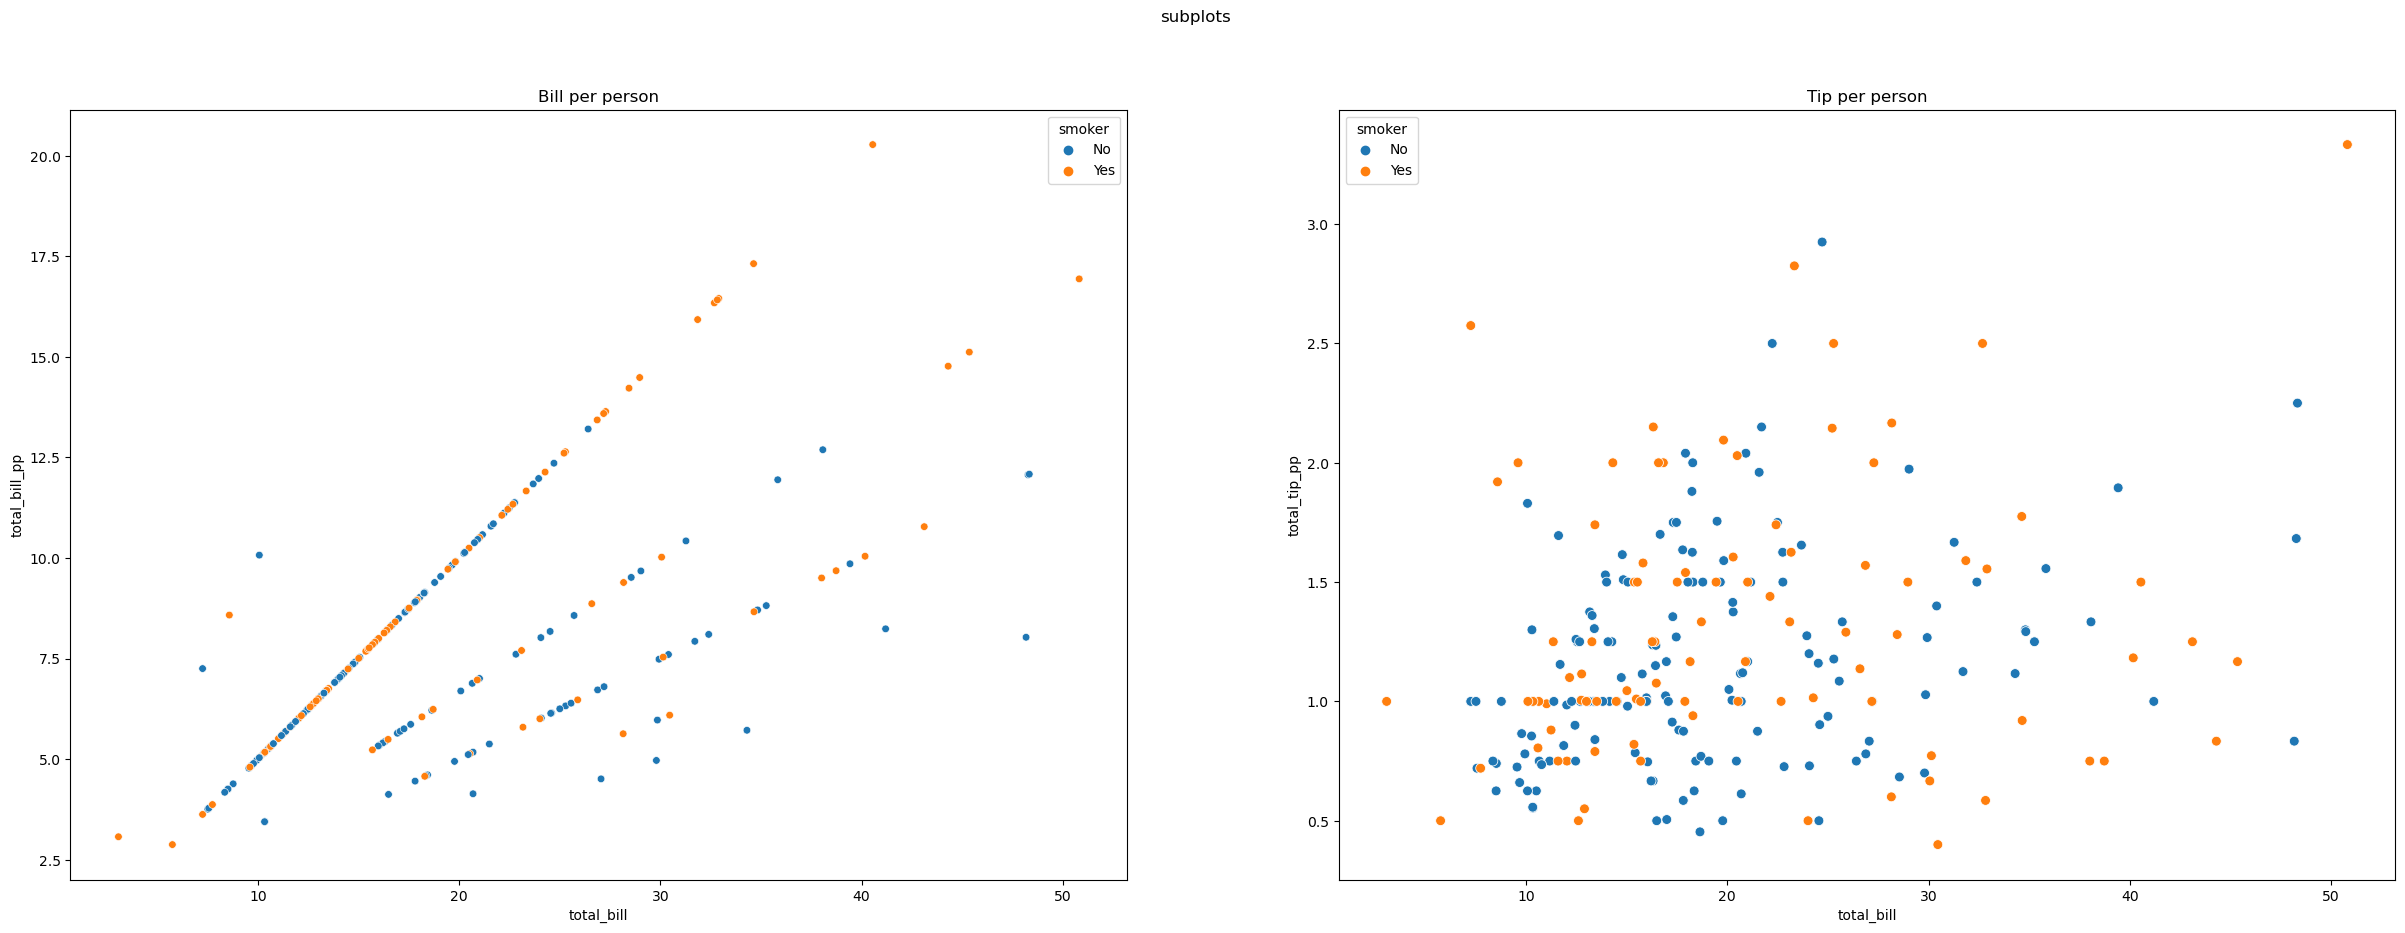

In [18]:
f, axes=plt.subplots(1,2, figsize=(30,10))
sns.scatterplot(x='total_bill', y='total_bill_pp', hue='smoker', data=df1, s=30, ax=axes[0])
sns.scatterplot(x='total_bill', y='total_tip_pp', hue='smoker', data=df1, s=50, ax=axes[1])
axes[0].set_title('Bill per person')
axes[1].set_title('Tip per person')
plt.suptitle('subplots')
plt.show()

### Conclusion:
#####  In the lineplot named "percentage of the bill per person" I see that this is one-to-one meaning that the amount each person pays is always directly proportional to the amount of people paying.
##### On the subplot named "Subplot" I made two scatterplots, on the first I find that most of the data fall under those who paid 10 to 30. This is also a great way for me to check if the percentage per person is correct, which it is.

# Task 2A

##### I made a series using pandas.Series. Information i used is Hospital name, location, main campus, when it was established, how many employees, how many beds, emergency department, budget and visitors ca pr year.

In [19]:
# ———. n.d. “Oslo Universitetssykehus.” Wikipedia, The Free Encyclopedia. Accessed November 30, 2021h. https://no.wikipedia.org/w/index.php?title=Oslo_universitetssykehus&oldid=20383190.

import pandas

pandas.Series(['Oslo University Hospital','Oslo, Norway', 'Rikshospitalet, Ullevå, Aker and Radiumhospitalet',
               '2009', '24000', '1870', 'Trauma center', ' 23000000000', '510000'],
              index=['Hospital name', 'Major location', 'Main campuses', 'Established', 'Employees', 'Beds',
                     'Emergency department', 'Budget', 'Visitors'])


Hospital name                                    Oslo University Hospital
Major location                                               Oslo, Norway
Main campuses           Rikshospitalet, Ullevå, Aker and Radiumhospitalet
Established                                                          2009
Employees                                                           24000
Beds                                                                 1870
Emergency department                                        Trauma center
Budget                                                        23000000000
Visitors                                                           510000
dtype: object

### Task 2B

##### In 2B I made 16 different series using pandas.Series. named them s1....s16.

In [20]:
# ———. 2021h. “St. Olav’s University Hospital.” Wikipedia, The Free Encyclopedia. October 13, 2021. https://en.wikipedia.org/w/index.php?title=St._Olav%27s_University_Hospital&oldid=1049751070.

s1=pandas.Series(['St. Olavs University Hospital', 'Trondheim, Norway', 'St. Olavs University Hospital', '1902',
               '11032', '1018', '10874000000', '310000'],
              index=['Hospital name', 'Location', 'Main campuses',
                     'Established', 'Employees', 'Beds', 'Budget', 'Visitors'])

In [21]:
# ———. n.d. “Drammen Sykehus.” Wikipedia, The Free Encyclopedia. Accessed November 30, 2021c. https://no.wikipedia.org/w/index.php?title=Drammen_sykehus&oldid=21505972.

s2=pandas.Series(['Drammen Hospital', 'Drammen, Norway', 'Drammen Hospital', '1887', '3000','', '', '160000'],
              index=['Hospital name', 'Location', 'Main campuses',
                     'Established', 'Employees', 'Beds', 'Budget', 'Visitors'])

In [22]:
# ———. 2021d. “Stavanger University Hospital.” Wikipedia, The Free Encyclopedia. March 6, 2021. https://en.wikipedia.org/w/index.php?title=Stavanger_University_Hospital&oldid=1010653629.

s3=pandas.Series(['Stavanger University Hospital', 'Stavanger, Norway', 'Stavanger University Hospital',
               '1927', '7500','' ,'5000000000','369000' ],
              index=['Hospital name', 'Location', 'Main campuses',
                     'Established', 'Employees', 'Beds', 'Budget', 'Visitors'])

In [23]:
# ———. 2021e. “University Hospital of North Norway.” Wikipedia, The Free Encyclopedia. March 12, 2021. https://en.wikipedia.org/w/index.php?title=University_Hospital_of_North_Norway&oldid=1011766146.

s4=pandas.Series(['University Hospital of North Norway', 'Tromsø, Norway', 'University Hospital of North Norway',
               '1991', '6300', '', '7950000000', '130000'],
              index=['Hospital name', 'Location', 'Main campuses',
                     'Established', 'Employees', 'Beds', 'Budget', 'Visitors'])

In [24]:
# ———. 2021b. “Levanger Hospital.” Wikipedia, The Free Encyclopedia. March 6, 2021. https://en.wikipedia.org/w/index.php?title=Levanger_Hospital&oldid=1010668244.

s5=pandas.Series(['Levanger Hospital', 'Levanger, Norway', 'Levanger Hospital',
               '1843', '', '', '', '95000'],
              index=['Hospital name', 'Location', 'Main campuses',
                     'Established', 'Employees', 'Beds', 'Budget', 'Visitors'])

In [25]:
# ———. n.d. “Kristiansund Sykehus.” Wikipedia, The Free Encyclopedia. Accessed November 30, 2021e. https://no.wikipedia.org/w/index.php?title=Kristiansund_sykehus&oldid=21380235.

s6=pandas.Series(['Kristiansund Hospital', 'Kristiansund, Norway', 'Kristiansund Hospital',
               '1985', '', '', '', '60000'],
              index=['Hospital name', 'Location', 'Main campuses',
                     'Established', 'Employees', 'Beds', 'Budget', 'Visitors'])

In [26]:
# ———. 2021a. “Haukeland University Hospital.” Wikipedia, The Free Encyclopedia. February 28, 2021. https://en.wikipedia.org/w/index.php?title=Haukeland_University_Hospital&oldid=100943

s7=pandas.Series(['Haukeland Hospital', 'Bergen, Norway', 'Haukeland Hospital', '1912', '11800', '1100',
               '10000000000', '380000'],
              index=['Hospital name', 'Location', 'Main campuses',
                     'Established', 'Employees', 'Beds', 'Budget', 'Visitors'])

In [27]:
# ———. 2020b. “Ringerike Hospital.” Wikipedia, The Free Encyclopedia. July 19, 2020. https://en.wikipedia.org/w/index.php?title=Ringerike_Hospital&oldid=968471494.

s8=pandas.Series(['Ringerike Hospital', 'Hønefoss, Norway', 'Ringerike Hospital', '1965', '900', '', '', ''],
              index=['Hospital name', 'Location', 'Main campuses', 'Established', 'Employees', 'Beds', 'Budget', 'Visitors'])

In [28]:
# ———. 2021f. “Akershus University Hospital.” Wikipedia, The Free Encyclopedia. June 28, 2021. https://en.wikipedia.org/w/index.php?title=Akershus_University_Hospital&oldid=1030858740.

s9=pandas.Series(['Akershus University Hospital ', 'Oslo, Norway','Akershus University Hospital', '1961',
               '10000', '953', '', '600000'],
              index=['Hospital name', 'Location', 'Main campuses',
                     'Established', 'Employees', 'Beds', 'Budget', 'Visitors'])

In [29]:
# ———. n.d. “Bærum Sykehus.” Wikipedia, The Free Encyclopedia. Accessed November 30, 2021b. https://no.wikipedia.org/w/index.php?title=B%C3%A6rum_sykehus&oldid=20894717.

s10=pandas.Series(['Bærum Hospital', 'Oslo, Norway', 'Bærum Hospital', '1924', '2300', '','', '160000'],
              index=['Hospital name', 'Location', 'Main campuses',
                     'Established', 'Employees', 'Beds', 'Budget', 'Visitors'])

In [30]:
#Wikipedia contributors. (n.d.). Sykehuset Østfold. Wikipedia, The Free Encyclopedia. Retrieved November 30, 2021, from https://no.wikipedia.org/w/index.php?title=Sykehuset_%C3%98stfold&oldid=20875608

s11=pandas.Series(['Østfold Hospital', 'Sarpsborg, Norway', 'Østfold Hospital', '2001', '5000', '','', '298000'],
              index=['Hospital name', 'Location', 'Main campuses',
                     'Established', 'Employees', 'Beds', 'Budget', 'Visitors'])



In [31]:
#Wikipedia contributors. 2020a. “Skien Hospital.” Wikipedia, The Free Encyclopedia. May 25, 2020. https://en.wikipedia.org/w/index.php?title=Skien_Hospital&oldid=958839194.

s12=pandas.Series(['Skien Hospital', 'Skien, Norway', 'Skien Hospital', '2001', '3000','','', '170000'],
              index=['Hospital name', 'Location', 'Main campuses',
                     'Established', 'Employees', 'Beds', 'Budget', 'Visitors'])

In [32]:
# ———. 2021c. “Sandviken Hospital.” Wikipedia, The Free Encyclopedia. March 6, 2021. https://en.wikipedia.org/w/index.php?title=Sandviken_Hospital&oldid=1010696837.

s13=pandas.Series(['Sandviken Hospital', 'Bergen, Norway', 'Sandviken Hospital', '1891', '','','', ''],
              index=['Hospital name', 'Location', 'Main campuses',
                     'Established', 'Employees', 'Beds', 'Budget', 'Visitors'])

In [33]:
# ———. n.d. “Molde Sjukehus.” Wikipedia, The Free Encyclopedia. Accessed November 30, 2021g. https://no.wikipedia.org/w/index.php?title=Molde_sjukehus&oldid=21688715.

s14=pandas.Series(['Molde Hospital', 'Molde, Norway', 'Molde Hospital', '1960', '1500', '246', '', '60000'],
              index=['Hospital name', 'Location', 'Main campuses',
                     'Established', 'Employees', 'Beds', 'Budget', 'Visitors'])

In [34]:
# ———. n.d. “Haugesund Sjukehus.” Wikipedia, The Free Encyclopedia. Accessed November 30, 2021d. https://no.wikipedia.org/w/index.php?title=Haugesund_sjukehus&oldid=21655986.

s15=pandas.Series(['Haugesund Hospital', 'Haugesund, Norway', 'Haugesund Hospital', '1889', '', '233', '', '180000'],
              index=['Hospital name', 'Location', 'Main campuses',
                     'Established', 'Employees', 'Beds', 'Budget', 'Visitors'])

In [35]:
# ———. n.d. “Ålesund Sjukehus.” Wikipedia, The Free Encyclopedia. Accessed November 30, 2021a. https://no.wikipedia.org/w/index.php?title=%C3%85lesund_sjukehus&oldid=21694058.

s16=pandas.Series(['Ålesund Hospital', 'Ålesund, Norway', 'Ålesund Hospital', '1971', '', '','' , '100000'],
              index=['Hospital name', 'Location', 'Main campuses',
                     'Established', 'Employees', 'Beds', 'Budget', 'Visitors'])

### Task 2C
##### I made a Dataframe from all the series using pd.dataframe and put all series in.

In [36]:
df5=pd.DataFrame([s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16])
print(df5)

                          Hospital name              Location  \
0         St. Olavs University Hospital     Trondheim, Norway   
1                      Drammen Hospital       Drammen, Norway   
2         Stavanger University Hospital     Stavanger, Norway   
3   University Hospital of North Norway        Tromsø, Norway   
4                     Levanger Hospital      Levanger, Norway   
5                 Kristiansund Hospital  Kristiansund, Norway   
6                    Haukeland Hospital        Bergen, Norway   
7                    Ringerike Hospital      Hønefoss, Norway   
8         Akershus University Hospital           Oslo, Norway   
9                        Bærum Hospital          Oslo, Norway   
10                     Østfold Hospital     Sarpsborg, Norway   
11                       Skien Hospital         Skien, Norway   
12                   Sandviken Hospital        Bergen, Norway   
13                       Molde Hospital         Molde, Norway   
14                   Haug

##### I checked the different types of the dataframe and got that all was an object.

In [37]:
df5.dtypes

Hospital name    object
Location         object
Main campuses    object
Established      object
Employees        object
Beds             object
Budget           object
Visitors         object
dtype: object

##### Here wee see the first 5 rows in the dataframe I made.

In [38]:
df5.head()

,Hospital name,Location,Main campuses,Established,Employees,Beds,Budget,Visitors
0,St. Olavs University Hospital,"Trondheim, Norway",St. Olavs University Hospital,1902,11032,1018,10874000000,310000
1,Drammen Hospital,"Drammen, Norway",Drammen Hospital,1887,3000,,,160000
2,Stavanger University Hospital,"Stavanger, Norway",Stavanger University Hospital,1927,7500,,5000000000,369000
3,University Hospital of North Norway,"Tromsø, Norway",University Hospital of North Norway,1991,6300,,7950000000,130000
4,Levanger Hospital,"Levanger, Norway",Levanger Hospital,1843,,,,95000


### Task 2D

##### I found out what regional health authority there was for each hospital and made a new column called : Regional Health Authority.

In [39]:
df5['Regional Health Authority']=['Central Norway Regional Health Authority',
                                  'Southern and Eastern Norway Regional Health Authority',
                                  'Western Norway Regional Health Authority',
                                  'Southern and Eastern Norway Regional Health Authority',
                                  'Northern Norway Regional Health Authority',
                                  'Central Norway Regional Health Authority',
                                  'Central Norway Regional Health Authority',
                                  'Western Norway Regional Health Authority',
                                  'Southern and Eastern Norway Regional Health Authority',
                                  'Southern and Eastern Norway Regional Health Authority',
                                  'Southern and Eastern Norway Regional Health Authority',
                                  'Southern and Eastern Norway Regional Health Authority',
                                  'Western Norway Regional Health Authority',
                                  'Central Norway Regional Health Authority',
                                  'Western Norway Regional Health Authority',
                                  'Central Norway Regional Health Authority']

In [40]:
df5.head()


,Hospital name,Location,Main campuses,Established,Employees,Beds,Budget,Visitors,Regional Health Authority
0,St. Olavs University Hospital,"Trondheim, Norway",St. Olavs University Hospital,1902,11032,1018,10874000000,310000,Central Norway Regional Health Authority
1,Drammen Hospital,"Drammen, Norway",Drammen Hospital,1887,3000,,,160000,Southern and Eastern Norway Regional Health Au...
2,Stavanger University Hospital,"Stavanger, Norway",Stavanger University Hospital,1927,7500,,5000000000,369000,Western Norway Regional Health Authority
3,University Hospital of North Norway,"Tromsø, Norway",University Hospital of North Norway,1991,6300,,7950000000,130000,Southern and Eastern Norway Regional Health Au...
4,Levanger Hospital,"Levanger, Norway",Levanger Hospital,1843,,,,95000,Northern Norway Regional Health Authority


### Task 3

#### Which regional health authority has the most visitors on average? and find visitors per employee.Visualise your results and draw a conclusion.


##### I had to convert the dtypes to strings. Strings provide more useful methods like string manipulation. Object is not the best to work with.

In [41]:
df_f=df5.convert_dtypes()
df_f

,Hospital name,Location,Main campuses,Established,Employees,Beds,Budget,Visitors,Regional Health Authority
0,St. Olavs University Hospital,"Trondheim, Norway",St. Olavs University Hospital,1902,11032,1018,10874000000,310000,Central Norway Regional Health Authority
1,Drammen Hospital,"Drammen, Norway",Drammen Hospital,1887,3000,,,160000,Southern and Eastern Norway Regional Health Au...
2,Stavanger University Hospital,"Stavanger, Norway",Stavanger University Hospital,1927,7500,,5000000000,369000,Western Norway Regional Health Authority
3,University Hospital of North Norway,"Tromsø, Norway",University Hospital of North Norway,1991,6300,,7950000000,130000,Southern and Eastern Norway Regional Health Au...
4,Levanger Hospital,"Levanger, Norway",Levanger Hospital,1843,,,,95000,Northern Norway Regional Health Authority
5,Kristiansund Hospital,"Kristiansund, Norway",Kristiansund Hospital,1985,,,,60000,Central Norway Regional Health Authority
6,Haukeland Hospital,"Bergen, Norway",Haukeland Hospital,1912,11800,1100,10000000000,380000,Central Norway Regional Health Authority
7,Ringerike Hospital,"Hønefoss, Norway",Ringerike Hospital,1965,900,,,,Western Norway Regional Health Authority
8,Akershus University Hospital,"Oslo, Norway",Akershus University Hospital,1961,10000,953,,600000,Southern and Eastern Norway Regional Health Au...
9,Bærum Hospital,"Oslo, Norway",Bærum Hospital,1924,2300,,,160000,Southern and Eastern Norway Regional Health Au...


##### I checked if it converted to strings which it did.

In [42]:
df_f.dtypes

Hospital name                string
Location                     string
Main campuses                string
Established                  string
Employees                    string
Beds                         string
Budget                       string
Visitors                     string
Regional Health Authority    string
dtype: object

##### I changed the columns Visitors, Beds, Budget, Employees and Established to numeric instead of strings.

In [43]:
df_f['Visitors']=pd.to_numeric(df_f['Visitors'])
df_f['Beds']=pd.to_numeric(df_f['Beds'])
df_f['Budget']=pd.to_numeric(df_f['Budget'])
df_f['Employees']=pd.to_numeric(df_f['Employees'])
df_f['Established']=pd.to_numeric(df_f['Established'])

##### I checked the types to that it was the right value types I wanted. Which it was.

In [44]:
df_f.dtypes

Hospital name                 string
Location                      string
Main campuses                 string
Established                    int64
Employees                    float64
Beds                         float64
Budget                       float64
Visitors                     float64
Regional Health Authority     string
dtype: object

##### I had to check if it was any NA values which it was.

In [45]:
df_f.isna().any()


Hospital name                False
Location                     False
Main campuses                False
Established                  False
Employees                     True
Beds                          True
Budget                        True
Visitors                      True
Regional Health Authority    False
dtype: bool

##### I thought all the different regional health authority was a bit long, so I changed it to a bit shorter name. I used replace() to replace it with new ones.

In [46]:
df_r=df_f.replace(['Central Norway Regional Health Authority',
              'Southern and Eastern Norway Regional Health Authority',
              'Western Norway Regional Health Authority',
              'Northern Norway Regional Health Authority'],
             ['Center', 'South, West', 'Western', 'North'])

##### I did not find any values for visitors for  Sandviken and Ringerike. Therefore, I decided to put in dummy values based on the populations and employees. I measured it against those who had ish the same population, employees and had data on visitors in the dataframe.

In [47]:
df_r.at[12, 'Visitors']='60000'
df_r.at[7, 'Visitors']='50000'

##### Had to put in dummy values after a lot of research, I did not find employees on these. So i decided to put in dummy values based on the others hospitals visitors and employees in the dataframe.

In [48]:
df_r.at[4, 'Employees']='1200'
df_r.at[5, 'Employees']='1000'
df_r.at[12, 'Employees']='1300'
df_r.at[14, 'Employees']='2500'
df_r.at[15, 'Employees']='2000'

##### I decided to make a new column named vis_pe. This column shows how many visitors each employee had in that hospital.

In [49]:
df_r['vis_pe']=df_r['Visitors']/df_r['Employees']

##### I showed all the rows in the dataframe to check that it came out right. Which it did

In [50]:
df_r.head(16)

,Hospital name,Location,Main campuses,Established,Employees,Beds,Budget,Visitors,Regional Health Authority,vis_pe
0,St. Olavs University Hospital,"Trondheim, Norway",St. Olavs University Hospital,1902,11032.0,1018.0,1.087400e+10,310000.0,Center,28.100073
1,Drammen Hospital,"Drammen, Norway",Drammen Hospital,1887,3000.0,NaN,NaN,160000.0,"South, West",53.333333
2,Stavanger University Hospital,"Stavanger, Norway",Stavanger University Hospital,1927,7500.0,NaN,5.000000e+09,369000.0,Western,49.200000
3,University Hospital of North Norway,"Tromsø, Norway",University Hospital of North Norway,1991,6300.0,NaN,7.950000e+09,130000.0,"South, West",20.634921
4,Levanger Hospital,"Levanger, Norway",Levanger Hospital,1843,1200.0,NaN,NaN,95000.0,North,79.166667
5,Kristiansund Hospital,"Kristiansund, Norway",Kristiansund Hospital,1985,1000.0,NaN,NaN,60000.0,Center,60.000000
6,Haukeland Hospital,"Bergen, Norway",Haukeland Hospital,1912,11800.0,1100.0,1.000000e+10,380000.0,Center,32.203390
7,Ringerike Hospital,"Hønefoss, Norway",Ringerike Hospital,1965,900.0,NaN,NaN,50000.0,Western,55.555556
8,Akershus University Hospital,"Oslo, Norway",Akershus University Hospital,1961,10000.0,953.0,NaN,600000.0,"South, West",60.000000
9,Bærum Hospital,"Oslo, Norway",Bærum Hospital,1924,2300.0,NaN,NaN,160000.0,"South, West",69.565217


### Visualisation:

##### I made a barplot. Here we see the average visitors per regional health authority.We find out that it was those hospitals in Southern and Western regional health authority that has the most visitors.

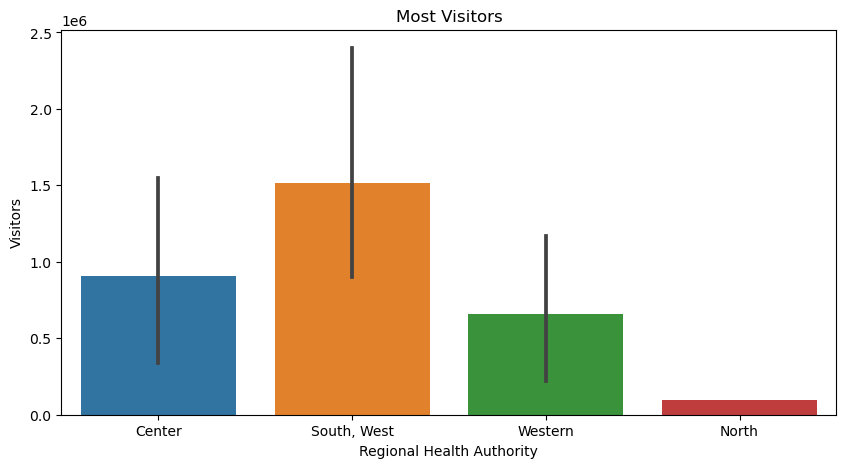

In [51]:
plt.figure(figsize=(10,5))
sns.barplot(x='Regional Health Authority', y='Visitors', data=df_r, estimator=sum)
plt.title('Most Visitors')
plt.show()

##### In this visualisation I made a scatterplot. Here we see how many employees and visitors the different regional health authority has.

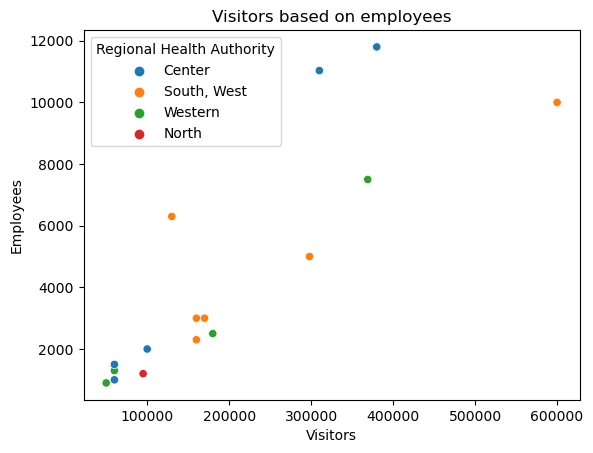

In [52]:
sns.scatterplot(x='Visitors', y='Employees', hue='Regional Health Authority', data=df_r)
plt.title('Visitors based on employees')
plt.show()

##### I made a scatterplot. This shows how many visitors per employee based on how many employees there is. We can find which regional health authorities had the most visitors but the least employees, or the least visitors but the most employees.

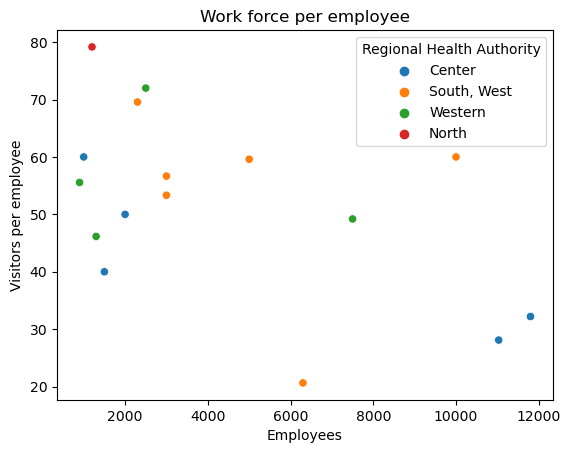

In [53]:
sns.scatterplot(x='Employees', y='vis_pe', data=df_r, hue='Regional Health Authority')
plt.ylabel('Visitors per employee')
plt.title('Work force per employee')
plt.show()

### Conclusion:
##### I began with a dataframe with only object in it, so I had to change it to float,int or string. This provides me with more options when I work wirth the dataframe. I used convert() to change it.
##### The regional health authority names for each hospital I thought was a bit long to put into a graph. I shortened the names to 'Western', 'South, West', 'North' and 'Center. I used replace() method to do so. After this I saw the dataframe had many NA values, I decided to put in dummy values based on the information other hospitals had. I put dummy values in to Employees and Visitors.
##### After ive done that I found out visitors per employee and made a new column named 'vis_pe'.
### visualisation part:
##### On the first visualisation named 'Most Visitors', I made a barplot. This shows me who had the most visitors for each regional health authority. I found out that Southern and Western regional health authority had the most visitors, and Northern regional health authority has the least visitors. This is because the dataframe had more hospitals laying in the Southern and Western region.
##### On the second visualisation named 'Visitors based on employees' I made a scatterplot. This visualisation shows me each hospital visitors and employees. I find that the Southern and Western regional health authority had the most visitors but not the most employees. The central regional health authority had the most employees but not the most visitors.
##### On the third visualisation named 'Work force per employee' I made a scatterplot. The goal of this graph was to visualise who had the most and least visitors per employee. Those who was 12000 employees had one of the least visitors per employee. Those who had 80 visitors per employee had ish 1800 employees. This tells me also that the Northern regional health authority has four times as much as the one who only has 20 visitors per employee.


